# Exploratory Analysis of NN

In [13]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file produced from the network. 

Note: This the file should contain two the training & validation scores for each of the models (i.e. regular and slow).

In [14]:
df = pd.read_csv("accuracy_metrics")

Cleaning the dataframe for readability and graphability.

In [15]:
df = df.drop(['Unnamed: 0', '0', '3'], axis=1).drop([0])

In [16]:
df = df.rename({'1':"Slow Training",'2': "Slow Validation", '4':"Reg. Train", '5':"Reg. Validation"}, axis=1)

In [17]:
df

,Slow Training,Slow Validation,Reg. Train,Reg. Validation
1,0.244769,0.141844,0.205290,0.094563
2,0.205290,0.094563,0.134228,0.094563
3,0.189499,0.094563,0.118437,0.047281
4,0.165811,0.094563,0.118437,0.047281
5,0.150020,0.094563,0.118437,0.047281
6,0.134228,0.094563,0.094749,0.047281
7,0.126332,0.094563,0.094749,0.047281
8,0.126332,0.094563,0.078958,0.047281
9,0.126332,0.047281,0.063166,0.047281
10,0.118437,0.047281,0.071062,0.047281


Graphing the plot

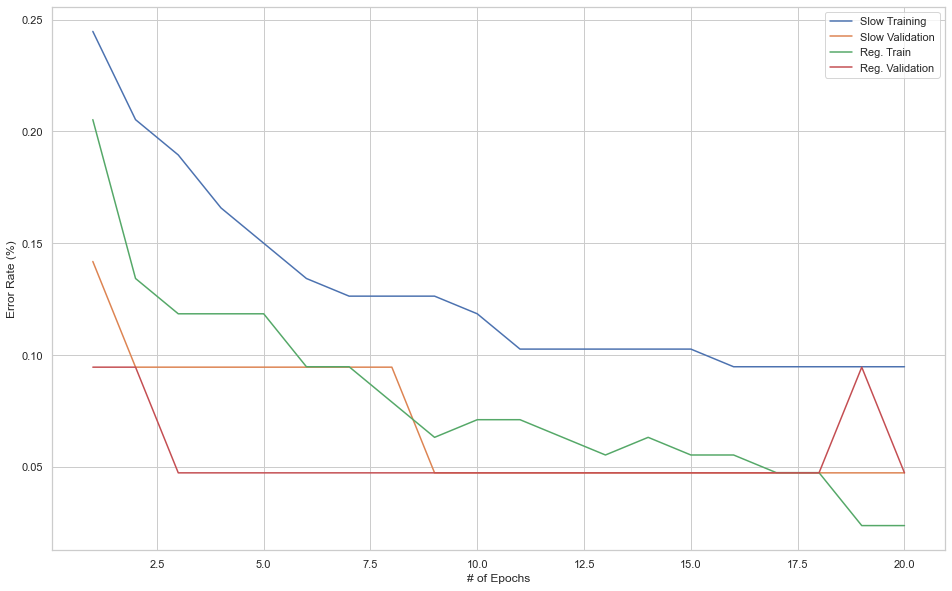

In [18]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
sns.lineplot(data=df, dashes=False);

plt.xlabel("# of Epochs");
plt.ylabel("Error Rate (%)");